In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [2]:
max_features = 10000  # Only consider the top 10k words
maxlen = 200  # Cut texts after this number of words

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
def plot_history(history, title=""):
    plt.plot(history.history['accuracy'], label='train acc')
    plt.plot(history.history['val_accuracy'], label='val acc')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [4]:
rnn_model = Sequential([
    Embedding(max_features, 32),
    SimpleRNN(32),
    Dense(1, activation='sigmoid')
])

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 17ms/step - accuracy: 0.5902 - loss: 0.6520 - val_accuracy: 0.8102 - val_loss: 0.4233
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8443 - loss: 0.3621 - val_accuracy: 0.8154 - val_loss: 0.4266
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9096 - loss: 0.2373 - val_accuracy: 0.8378 - val_loss: 0.4259
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.9644 - loss: 0.1098 - val_accuracy: 0.8070 - val_loss: 0.5500
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9891 - loss: 0.0429 - val_accuracy: 0.7986 - val_loss: 0.6670
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9962 - loss: 0.0177 - val_accuracy: 0.7246 - val_loss: 0.9181
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9954 - loss: 0.0178 - val_accuracy: 0.7978 - val_loss: 0.8241
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9972 - loss: 0.0127 - val_a

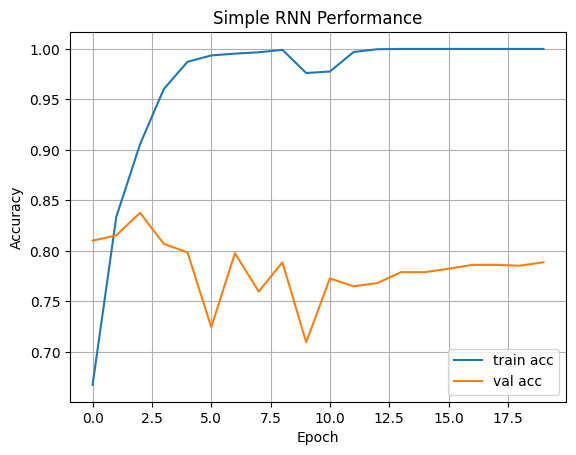

In [5]:
rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_history = rnn_model.fit(x_train, y_train, epochs=20, validation_split=0.2)

plot_history(rnn_history, title="Simple RNN Performance")

In [10]:
lstm_model = Sequential([
    Embedding(max_features, 32),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.6950 - loss: 0.5580 - val_accuracy: 0.8478 - val_loss: 0.3648
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8920 - loss: 0.2850 - val_accuracy: 0.8524 - val_loss: 0.3450
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9255 - loss: 0.1996 - val_accuracy: 0.8668 - val_loss: 0.3181
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9473 - loss: 0.1527 - val_accuracy: 0.8696 - val_loss: 0.3548
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9596 - loss: 0.1218 - val_accuracy: 0.8446 - val_loss: 0.3764
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9678 - loss: 0.0997 - val_accuracy: 0.8544 - val_loss: 0.4011
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9670 - loss: 0.0969 - val_accuracy: 0.8564 - val_loss: 0.4163
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9836 - loss: 0.0561 - val_

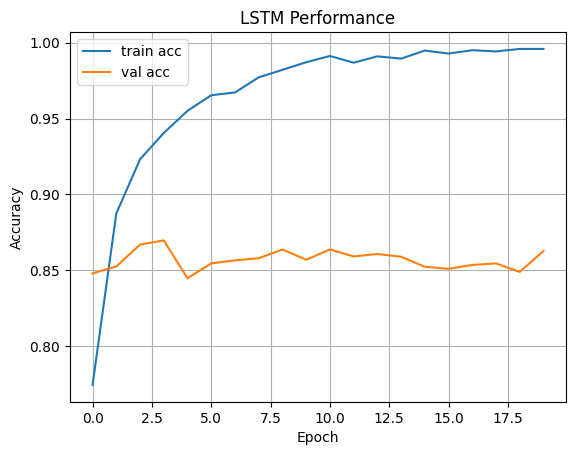

In [11]:
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_history = lstm_model.fit(x_train, y_train, epochs=20, validation_split=0.2)

plot_history(lstm_history, title="LSTM Performance")

In [12]:
gru_model = Sequential([
    Embedding(max_features, 32),
    GRU(32),
    Dense(1, activation='sigmoid')
])

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.6735 - loss: 0.5677 - val_accuracy: 0.8506 - val_loss: 0.3496
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9004 - loss: 0.2559 - val_accuracy: 0.8524 - val_loss: 0.3453
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9301 - loss: 0.1891 - val_accuracy: 0.8752 - val_loss: 0.3289
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9545 - loss: 0.1242 - val_accuracy: 0.8664 - val_loss: 0.3501
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9714 - loss: 0.0867 - val_accuracy: 0.8508 - val_loss: 0.4306
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9802 - loss: 0.0612 - val_accuracy: 0.8616 - val_loss: 0.5070
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9875 - loss: 0.0398 - val_accuracy: 0.8536 - val_loss: 0.5207
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9905 - loss: 0.0314 - val_

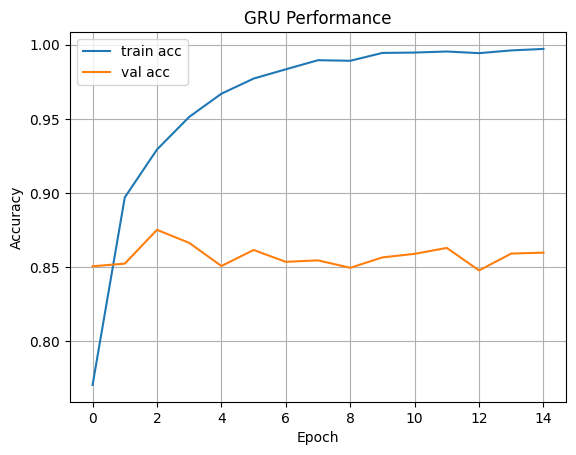

In [13]:
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru_history = gru_model.fit(x_train, y_train, epochs=15, validation_split=0.2)

plot_history(gru_history, title="GRU Performance")